In [1]:
import nltk
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
data = r"C:\Users\agaro\Documents\GitHub\Chiron\dataset1.csv"

df = pd.read_csv(data)

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to remove punctuation
def remove_punctuation(text):
    # Check if the input is a string
    if isinstance(text, str):
        punctuationfree = "".join([i for i in text if i not in string.punctuation and i not in ["'", '"', '—', '“', '”', '’', '––', '–']])
        return punctuationfree
    else:
        # Return an empty string or the original value for non-string inputs
        return ""

In [12]:

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = remove_punctuation(text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = ["'", '"', '—', '“', '”', '’', '––', '–', 'said', 'human', 'people', 'health', 'also', 'would', 'could', 'said', '2025', '2024', 'dec', 'feb', 'jan', 'nov', 'oct', 'sept', 'aug', 'july', 'june',
                                                                                                'may', 'april', 'march']
    stop_words = stop_words | set(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to the 'content' column
df['msg_tokenized'] = df['content'].apply(preprocess_text)

# Display the preprocessed tokens
print("Preprocessed Tokens:")
print(df['msg_tokenized'])

Preprocessed Tokens:
0       [staple, socalled, manospherethat, glamorous, ...
1       [new, condition, called, postvaccination, synd...
2       [half, woman, 30, reporting, early, symptom, m...
3       [lung, bird, contain, significant, quantity, m...
4       [nicolas, hulscher, epidemiologist, mccullough...
                              ...                        
2796    [new, randomized, controlled, trial, published...
2797    [trade, union, professional, body, represents,...
2798    [finnish, vaccine, expert, world, organization...
2799    [realisation, ‘, whole, covid, situation, frau...
2800    [america, intentionally, attack, many, incarna...
Name: msg_tokenized, Length: 2801, dtype: object


In [13]:
# Filter rows where 'annotation' is 1
authentic_tokens = df[df['annotation'] == 1]['msg_tokenized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 1:")
print("Length: " + str(len(authentic_tokens)))
print(authentic_tokens)

Preprocessed Tokens with Annotation = 1:
Length: 1401
400     [20, fda, approved, new, fastacting, insulin, ...
401     [20, athlete, certain, heart, condition, long,...
402     [19, u, hospital, see, dangerous, shortage, be...
403     [19, vaccine, pregnant, woman, protects, baby,...
404     [18, fda, approved, vimseltinib, new, oral, dr...
                              ...                        
1796    [recent, national, survey, showed, estimated, ...
1797    [mr, 48yearold, married, man, 3, child, seeing...
1798    [physician, researcher, continue, refine, unde...
1799    [vaccination, rate, low, measles, case, child,...
1800    [kaiser, news, 17yearold, boy, shaggy, blond, ...
Name: msg_tokenized, Length: 1401, dtype: object


In [14]:
# Filter rows where 'annotation' is 1
fake_tokens = df[df['annotation'] == 0]['msg_tokenized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 0:")
print("Length: " + str(len(fake_tokens)))
print(fake_tokens)

Preprocessed Tokens with Annotation = 0:
Length: 1400
0       [staple, socalled, manospherethat, glamorous, ...
1       [new, condition, called, postvaccination, synd...
2       [half, woman, 30, reporting, early, symptom, m...
3       [lung, bird, contain, significant, quantity, m...
4       [nicolas, hulscher, epidemiologist, mccullough...
                              ...                        
2796    [new, randomized, controlled, trial, published...
2797    [trade, union, professional, body, represents,...
2798    [finnish, vaccine, expert, world, organization...
2799    [realisation, ‘, whole, covid, situation, frau...
2800    [america, intentionally, attack, many, incarna...
Name: msg_tokenized, Length: 1400, dtype: object



Word Pool (Top 20):
[('patient', 4105), ('study', 3872), ('risk', 3074), ('year', 2511), ('disease', 2398), ('new', 2098), ('time', 1998), ('one', 1998), ('treatment', 1942), ('cancer', 1933), ('care', 1829), ('like', 1824), ('blood', 1697), ('drug', 1690), ('researcher', 1652), ('symptom', 1649), ('get', 1633), ('research', 1626), ('use', 1509), ('help', 1503), ('u', 1479), ('heart', 1469), ('woman', 1401), ('child', 1364), ('vaccine', 1362), ('many', 1341), ('found', 1295), ('covid', 1276), ('weight', 1270), ('medical', 1268), ('medication', 1263), ('according', 1242), ('body', 1232), ('need', 1212), ('age', 1205), ('university', 1199), ('medicine', 1196), ('day', 1189), ('level', 1185), ('make', 1150), ('food', 1147), ('doctor', 1134), ('md', 1127), ('among', 1114), ('condition', 1108), ('case', 1108), ('diabetes', 1075), ('adult', 1064), ('type', 1064), ('week', 1059)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


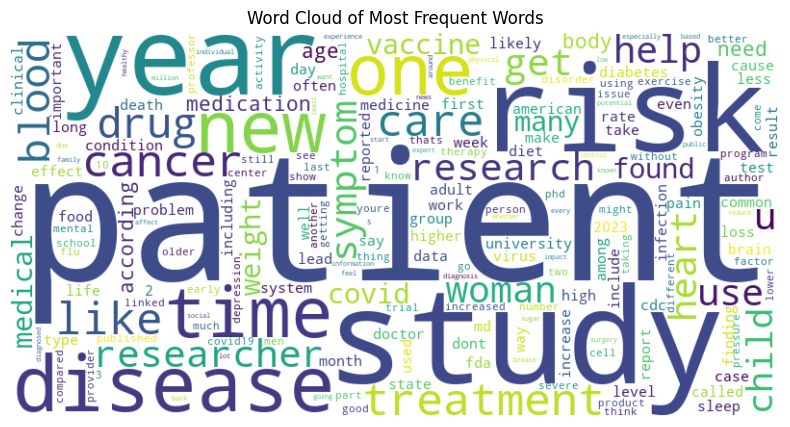

In [15]:
# Create a word pool (frequency distribution) for AUTHENTIC NEWS
word_pool = Counter()
for tokens in authentic_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


Word Pool (Top 20):
[('vaccine', 4964), ('study', 2244), ('food', 2166), ('covid19', 2033), ('one', 1920), ('child', 1880), ('new', 1837), ('like', 1546), ('year', 1522), ('u', 1509), ('state', 1473), ('related', 1452), ('cancer', 1450), ('government', 1378), ('time', 1371), ('covid', 1331), ('disease', 1325), ('public', 1304), ('medical', 1294), ('risk', 1288), ('drug', 1211), ('knowledge', 1138), ('even', 1126), ('according', 1123), ('video', 1115), ('many', 1086), ('death', 1086), ('case', 1078), ('free', 1054), ('found', 1037), ('using', 1025), ('use', 1023), ('dr', 1006), ('freedom', 1005), ('american', 987), ('help', 985), ('biden', 971), ('report', 964), ('research', 961), ('story', 955), ('effect', 950), ('including', 937), ('pandemic', 930), ('brighteoncom', 919), ('world', 904), ('percent', 896), ('ai', 869), ('system', 858), ('include', 856), ('support', 855)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


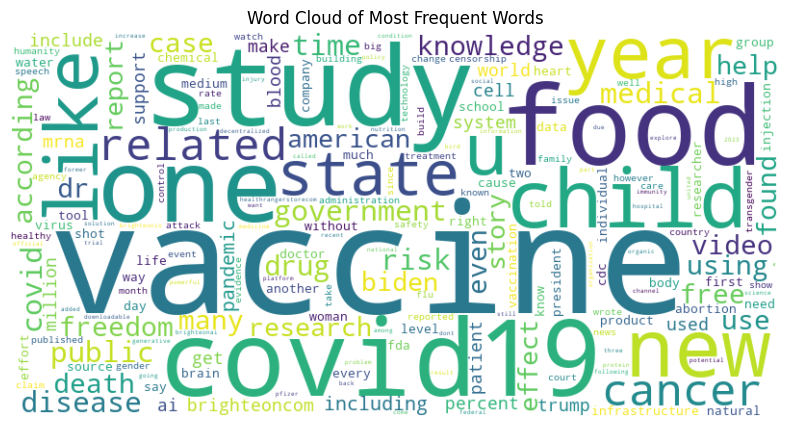

In [16]:
# Create a word pool (frequency distribution) for FAKE NEWS
word_pool = Counter()
for tokens in fake_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()


Word Pool (Top 20):
[('vaccine', 6326), ('study', 6116), ('patient', 4914), ('risk', 4362), ('year', 4033), ('new', 3935), ('one', 3918), ('disease', 3723), ('cancer', 3383), ('like', 3370), ('time', 3369), ('food', 3313), ('child', 3244), ('u', 2988), ('drug', 2901), ('covid19', 2662), ('covid', 2607), ('research', 2587), ('medical', 2562), ('use', 2532)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


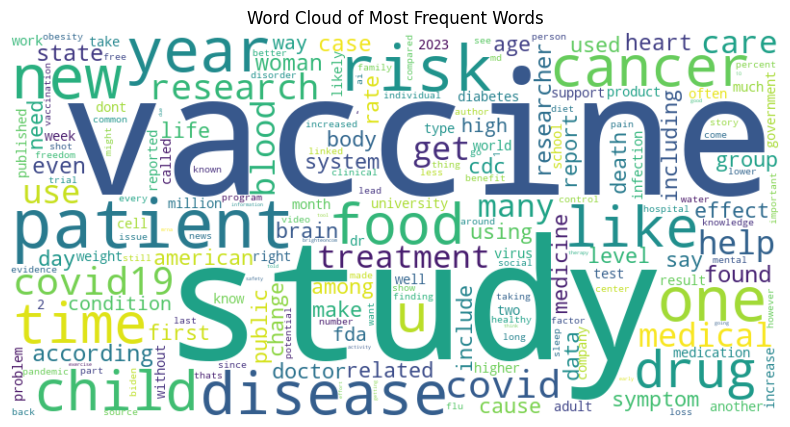

In [17]:


# Create a word pool (frequency distribution)
word_pool = Counter()
for tokens in df['msg_tokenized']:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(20))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.show()

In [18]:
# Join tokenized words into strings for CountVectorizer
authentic_texts = [' '.join(tokens) for tokens in authentic_tokens]

# Limit vocabulary size to reduce memory usage
vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(authentic_texts)  # Use the joined texts here

# Compute co-occurrence matrix using sparse matrix multiplication
co_occurrence_matrix = (X.T @ X)
co_occurrence_matrix.setdiag(0)  # Set diagonal to 0 to exclude self-co-occurrence

# Convert to a DataFrame using sparse format to save memory
co_occurrence_df = pd.DataFrame.sparse.from_spmatrix(
    co_occurrence_matrix,
    index=vectorizer.get_feature_names_out(),
    columns=vectorizer.get_feature_names_out()
)

# Display the top 20 co-occurring word pairs
print("\nWord Association Table (Top 20 Co-occurring Word Pairs):")
top_pairs = co_occurrence_df.stack().sort_values(ascending=False).head(20)
print(top_pairs)

# --- Step 2: Prepare Data for Apriori Algorithm ---

# Convert tokenized messages into a list of transactions
transactions = authentic_tokens  # Use the original tokenized list here

# Encode transactions into a one-hot format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# --- Step 3: Apply the Apriori Algorithm ---

# Use a lower min_support threshold to find more itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)  # Adjust min_support as needed

# Check if frequent itemsets were found
if frequent_itemsets.empty:
    print("\nNo frequent itemsets found. Try lowering the min_support threshold or adding more data.")
else:
    # Display frequent itemsets
    print("\nFrequent Itemsets:")
    print(frequent_itemsets)

    # Generate association rules with a confidence threshold
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  # Adjust min_threshold as needed

    # Display association rules
    print("\nAssociation Rules:")
    print(rules)


Word Association Table (Top 20 Co-occurring Word Pairs):
treatment  patient      16154
patient    treatment    16154
care       patient      15918
patient    care         15918
risk       patient      13556
patient    risk         13556
study      risk         13193
risk       study        13193
study      patient      12558
patient    study        12558
disease    heart        12005
heart      disease      12005
disease    patient      11576
patient    disease      11576
cancer     patient      10833
patient    cancer       10833
diabetes   type         10179
type       diabetes     10179
breast     cancer       10153
cancer     breast       10153
dtype: Sparse[int64, 0]


MemoryError: Unable to allocate 55.1 GiB for an array with shape (14077960, 3, 1401) and data type bool

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import scipy.sparse as sp

# Assuming df is already loaded and contains 'msg_tokenized' and 'msg_cleaned' columns

# --- Step 1: Create a Word Association Table (Co-occurrence Matrix) ---

# Limit vocabulary size to reduce memory usage
vectorizer = CountVectorizer(max_features=10000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['msg_cleaned'])

# Compute co-occurrence matrix using sparse matrix multiplication
co_occurrence_matrix = (X.T @ X)
co_occurrence_matrix.setdiag(0)  # Set diagonal to 0 to exclude self-co-occurrence

# Convert to a DataFrame using sparse format to save memory
co_occurrence_df = pd.DataFrame.sparse.from_spmatrix(
    co_occurrence_matrix,
    index=vectorizer.get_feature_names_out(),
    columns=vectorizer.get_feature_names_out()
)

# Display the top 20 co-occurring word pairs
print("\nWord Association Table (Top 20 Co-occurring Word Pairs):")
top_pairs = co_occurrence_df.stack().sort_values(ascending=False).head(20)
print(top_pairs)

# --- Step 2: Prepare Data for Apriori Algorithm ---

# Convert tokenized messages into a list of transactions
transactions = df['msg_tokenized'].tolist()

# Encode transactions into a one-hot format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# --- Step 3: Apply the Apriori Algorithm ---

# Use a lower min_support threshold to find more itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)  # Adjust min_support as needed

# Check if frequent itemsets were found
if frequent_itemsets.empty:
    print("\nNo frequent itemsets found. Try lowering the min_support threshold or adding more data.")
else:
    # Display frequent itemsets
    print("\nFrequent Itemsets:")
    print(frequent_itemsets)

    # Generate association rules with a confidence threshold
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  # Adjust min_threshold as needed

    # Display association rules
    print("\nAssociation Rules:")
    print(rules)


Word Association Table (Top 20 Co-occurring Word Pairs):
vaccine  said       32081
said     vaccine    32081
vaccine  covid19    31382
covid19  vaccine    31382
said     health     30240
health   said       30240
         also       25031
also     health     25031
vaccine  health     23757
health   vaccine    23757
said     also       19832
also     said       19832
child    vaccine    19177
vaccine  child      19177
people   said       18859
said     people     18859
case     vaccine    17343
vaccine  case       17343
health   people     17006
people   health     17006
dtype: Sparse[int64, 0]


MemoryError: Unable to allocate 70.4 GiB for an array with shape (7444663, 3, 3384) and data type bool